In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
sys.path.append("/Users/chernals/cernbox/Work/packages")
sys.path.append("/Users/chernals/Dropbox/IBA/Work/IBA-Optics/beamlines")
PATH = "/Users/chernals/Dropbox/IBA/Work/IBA-Optics/beamlines"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import georges
import physics
from magnets import esbtsquad_current_to_gradient

In [293]:
r = 4.1
energy = georges.physics.range_to_energy(r)
pc = georges.physics.energy_to_momentum(energy)
brho = georges.physics.momentum_to_brho(pc)
context = {
        'PARTICLE': 'PROTON',
        'PC': pc,
        'BETAX'   : physics.get_degrader_spot_size(energy)/physics.get_degrader_divergence(energy),
        'BETAY'   : physics.get_degrader_spot_size(energy)/physics.get_degrader_divergence(energy),
        'ALPHAX': 0.0,
        'ALPHAY': 0.0,
        'DELTAP': 0.0,
        'DPP': 0.2e-2,
        'MOMENTUM_SLITS_OPENING' : 1.015,
        'DIVERGENCE_SLITS_OPENING_X' : 1.015,
        'DIVERGENCE_SLITS_OPENING_Y' : 1.015,
        'N_TRACKING': 5000,
        'EMITX': 1e-6*physics.get_degrader_spot_size(energy)*physics.get_degrader_divergence(energy),
        'EMITY': 1e-6*physics.get_degrader_spot_size(energy)*physics.get_degrader_divergence(energy),
        'IQ1E': esbtsquad_current_to_gradient(0)/brho,
        'IQ2E': -esbtsquad_current_to_gradient(40)/brho,
        'IQ3E': esbtsquad_current_to_gradient(0)/brho,
        'IQ47E': -esbtsquad_current_to_gradient(65.06655)/brho,
        'IQ56E': esbtsquad_current_to_gradient(56.10315)/brho,
        'IQ8E': esbtsquad_current_to_gradient(63.98455)/brho,
        'IQ9E': -esbtsquad_current_to_gradient(62.71815)/brho,
        'IQ10E': esbtsquad_current_to_gradient(21.15985)/brho,
        'IQ1B1': esbtsquad_current_to_gradient(107.67265)/brho,
        'IQ2B1': -esbtsquad_current_to_gradient(109.94395)/brho,
        'IQ3B1': esbtsquad_current_to_gradient(107.67265)/brho,
        'IQ1F1': -esbtsquad_current_to_gradient(41.27555)/brho,
        'IQ2F1': esbtsquad_current_to_gradient(36.8144)/brho,
}

In [294]:
bl = georges.Beamline(['degrader'], survey=True, path=PATH, prefix='PAT107', elements='elements')
#bl.to_thin('Q3E', context['IQ3E']*0.295)
#bl.to_thin('Q2E', -4*0.295)

bl_survey = georges.madx.survey(line=bl, context=context)
bl_twiss = georges.madx.twiss(line=bl, context=context, ptc=False, debug=False)
b = georges.Beam(energy=200).from_5d_multigaussian_distribution(context['N_TRACKING'],
                                                   XRMS=physics.get_degrader_spot_size(energy)/1000,
                                                   PXRMS=physics.get_degrader_divergence(energy)/1000,
                                                   YRMS=physics.get_degrader_spot_size(energy)/1000,
                                                   PYRMS=physics.get_degrader_divergence(energy)/1000,
                                                   DPPRMS=0.00)
bl_track = georges.madx.track(line=bl.add_markers(), context=context, beam=b, debug=False)

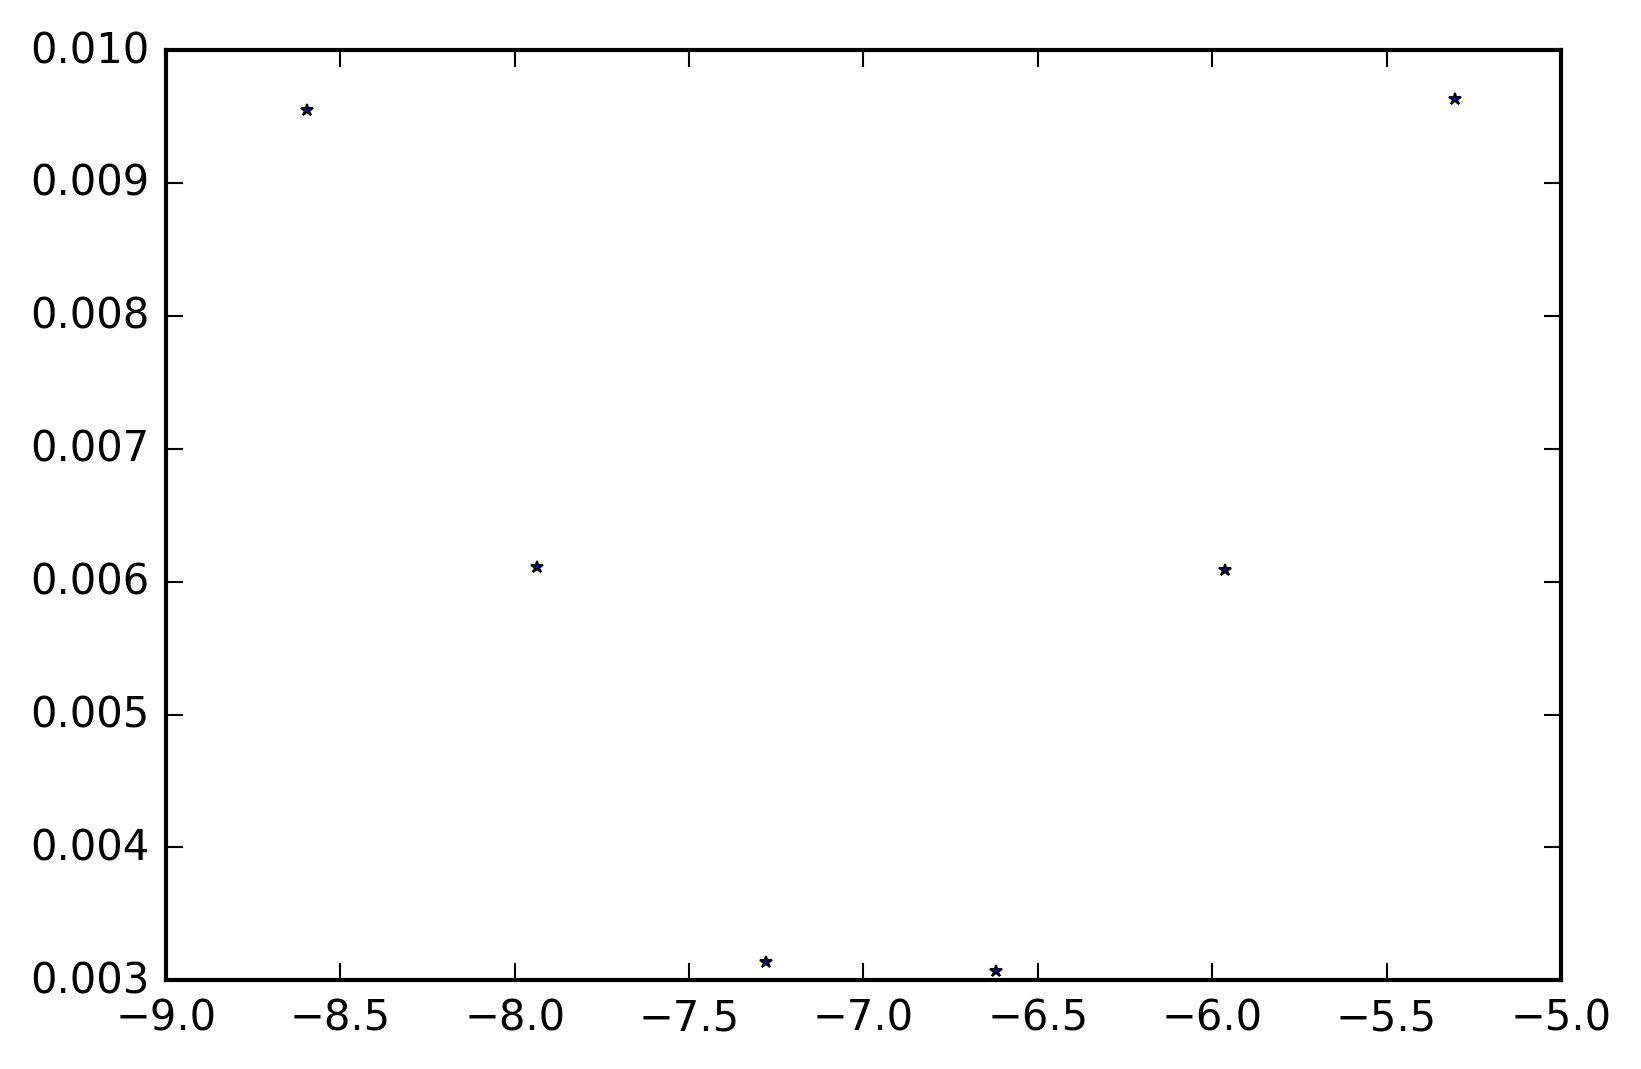

In [236]:
variquad_data = np.array([[ 40.  ,  45.  ,  50.  ,  55.  ,  60.  ,  65.  ],
       [  9.63,   6.09,   3.07,   3.14,   6.11,   9.55]]).transpose()
variquad_data[:,0] = list(map(lambda c: -esbtsquad_current_to_gradient(c)/brho, variquad_data[:,0]))
variquad_data[:,1] = variquad_data[:,1]/1000



plt.plot(variquad_data[:,0],variquad_data[:,1], '*')

30.0
32.1052631579
34.2105263158
36.3157894737
38.4210526316
40.5263157895
42.6315789474
44.7368421053
46.8421052632
48.9473684211
51.0526315789
53.1578947368
55.2631578947
57.3684210526
59.4736842105
61.5789473684
63.6842105263
65.7894736842
67.8947368421
70.0


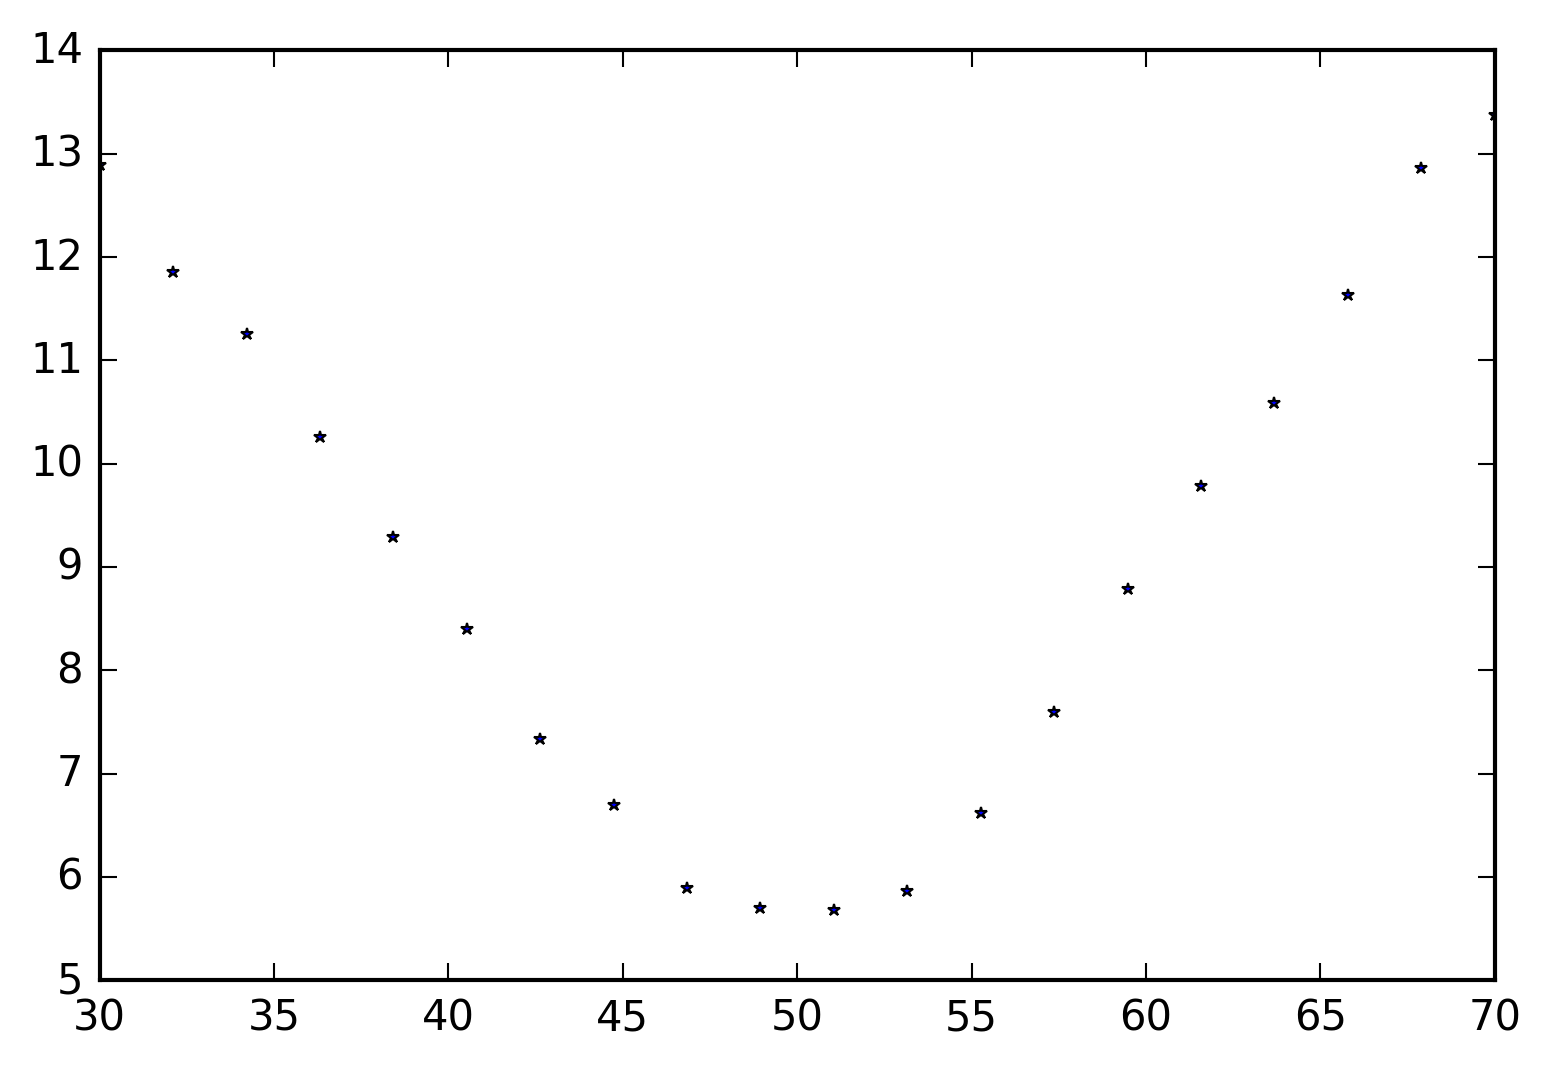

In [216]:
variquad_data = []
for c in np.linspace(30, 70, 20):
    print(c)
    k = -esbtsquad_current_to_gradient(c)/brho
    bl = georges.Beamline(['degrader'], survey=True, path=PATH, prefix='PAT107', elements='elements')
    context['IQ2E'] = k
    #bl.to_thin('Q2E', k)
    bl_track = georges.madx.track(line=bl.add_markers(), context=context, beam=b, debug=False)
    variquad_data.append([c, 1000*bl_track.line.query("BEAM == BEAM")['BEAM'].apply(lambda r: r.std['Y'])['P2E']])
    
variquad_data = np.array(variquad_data)
plt.plot(variquad_data[:,0],variquad_data[:,1], '*')

In [222]:
v

TypeError: list indices must be integers or slices, not tuple

{'alpha': -8.178913241476863,
 'beta': 7.6188420423500363,
 'emit': 4.6417427509120965e-05,
 'fit': [array([  3.16536139e-05,   4.40256565e-04,   1.53710118e-03]),
  array([  1.84650471e-07,   2.57271041e-06,   8.77472831e-06])],
 'fit_function': <function georges.measure.variquad.variquad.<locals>.<lambda>>,
 'gamma': 8.9114095599051719,
 'map': <georges.beamline.Beamline at 0x10fd497b8>,
 's11': 0.00035364704820422594,
 's12': 0.00037964411248964184,
 's22': 0.00041364470725098587,
 'x': array([-5.30411263, -5.96239797, -6.62068332, -7.27896867, -7.93725401,
        -8.59553936]),
 'y': array([  9.27369000e-05,   3.70881000e-05,   9.42490000e-06,
          9.85960000e-06,   3.73321000e-05,   9.12025000e-05])}

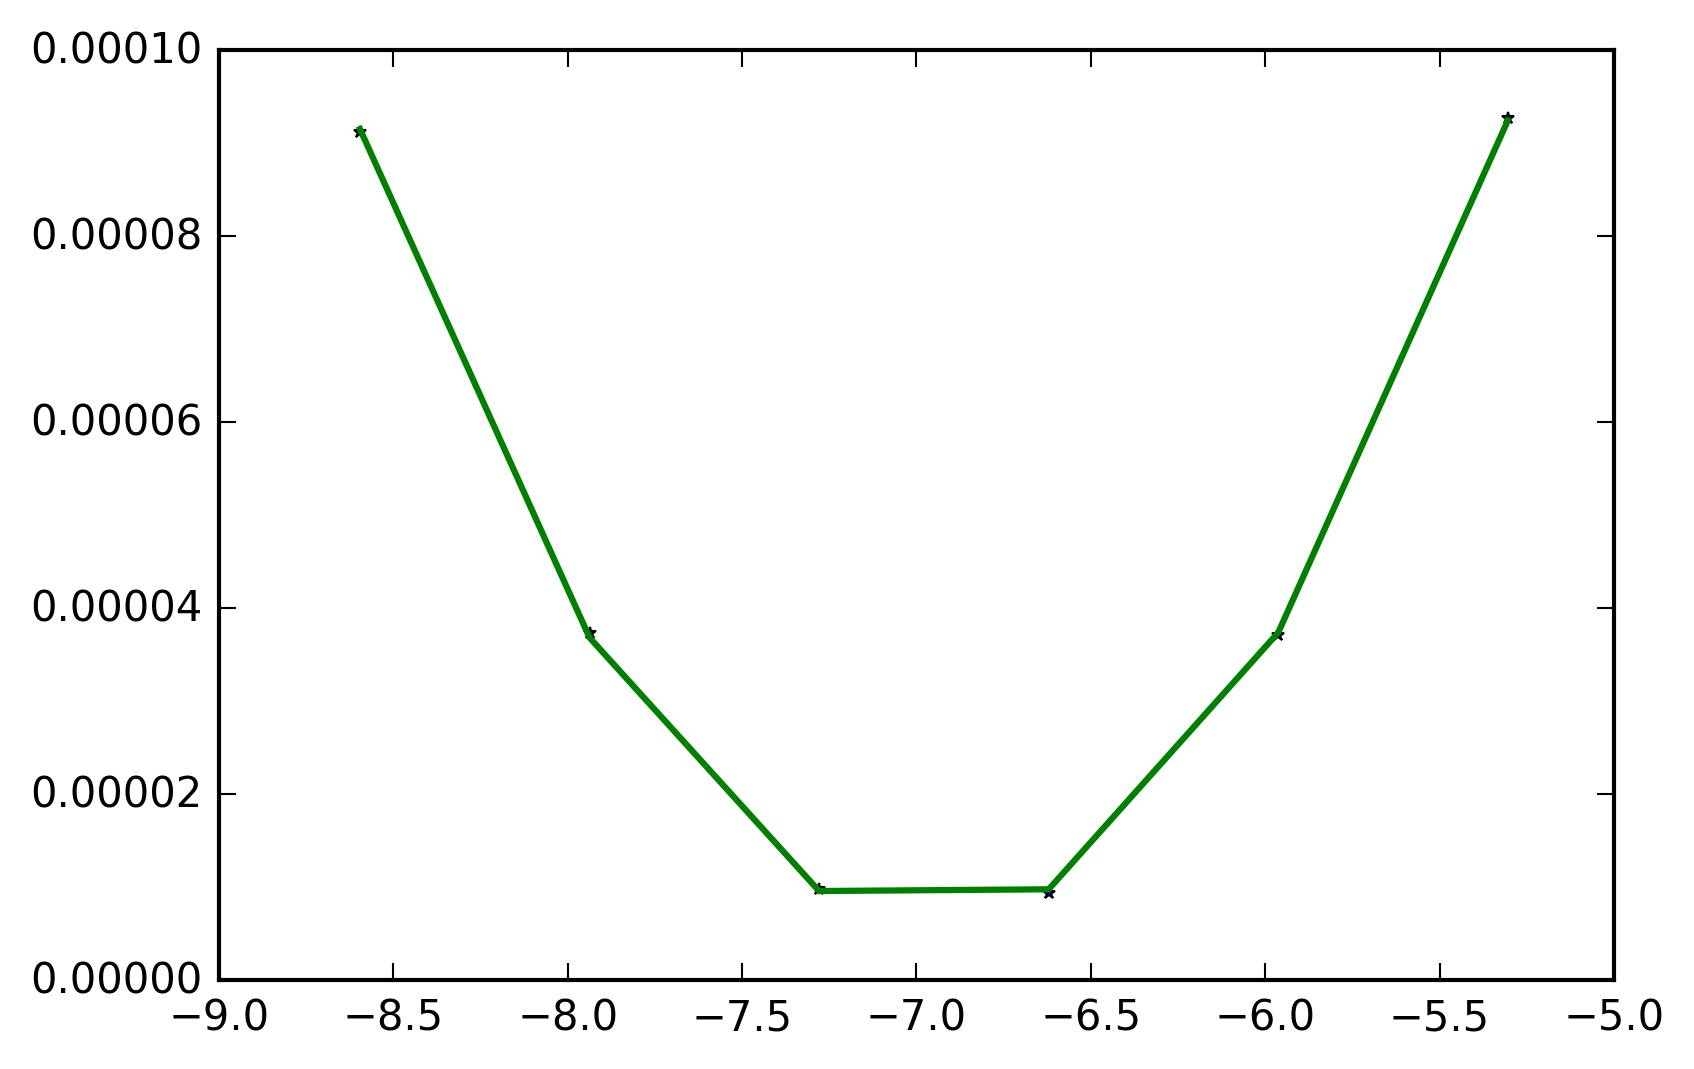

In [237]:
variquad = georges.measure.variquad(data=variquad_data, 
                         line=bl, 
                         context=context, 
                         start='Q2E', 
                         end='P2E', 
                         quad_length=0.295, 
                         plane='X',
                         debug=False
                        )
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(variquad['x'], variquad['y'], '*')
ax.plot(variquad['x'], variquad['fit_function'](variquad['x']))
variquad#['map'].line[['R11','R12','R22','R33','R34','R44']]

In [140]:
print("<X2> variquad: {}".format(1000*np.sqrt(variquad['s11'])))
print("<X2> tracking: {}".format(1000*bl_track.line.query("BEAM == BEAM")['BEAM'].apply(lambda r: r.std['X'])['Q2E_IN']))
print("<PX2> variquad: {}".format(1000*np.sqrt(variquad['s22'])))
print("<PX2> tracking: {}".format(1000*bl_track.line.query("BEAM == BEAM")['BEAM'].apply(lambda r: r.std['PX'])['Q2E_IN']))
print("Emit variquad: {}".format(variquad['emit']))
print("Emit tracking: {}".format(bl_track.line.loc['Q2E_IN']['BEAM'].emit['X']))
print("Emit init: {}".format(bl_track.line.loc['P1E']['BEAM'].emit['X']))

<X2> variquad: 6.806962429194908
<X2> tracking: 7.88423250446061
<PX2> variquad: 8.175233693602548
<PX2> tracking: 4.634554347180162
Emit variquad: 1.7988428433222667e-05
Emit tracking: 1.2038794608383335e-05
Emit init: 1.2038616385201601e-05


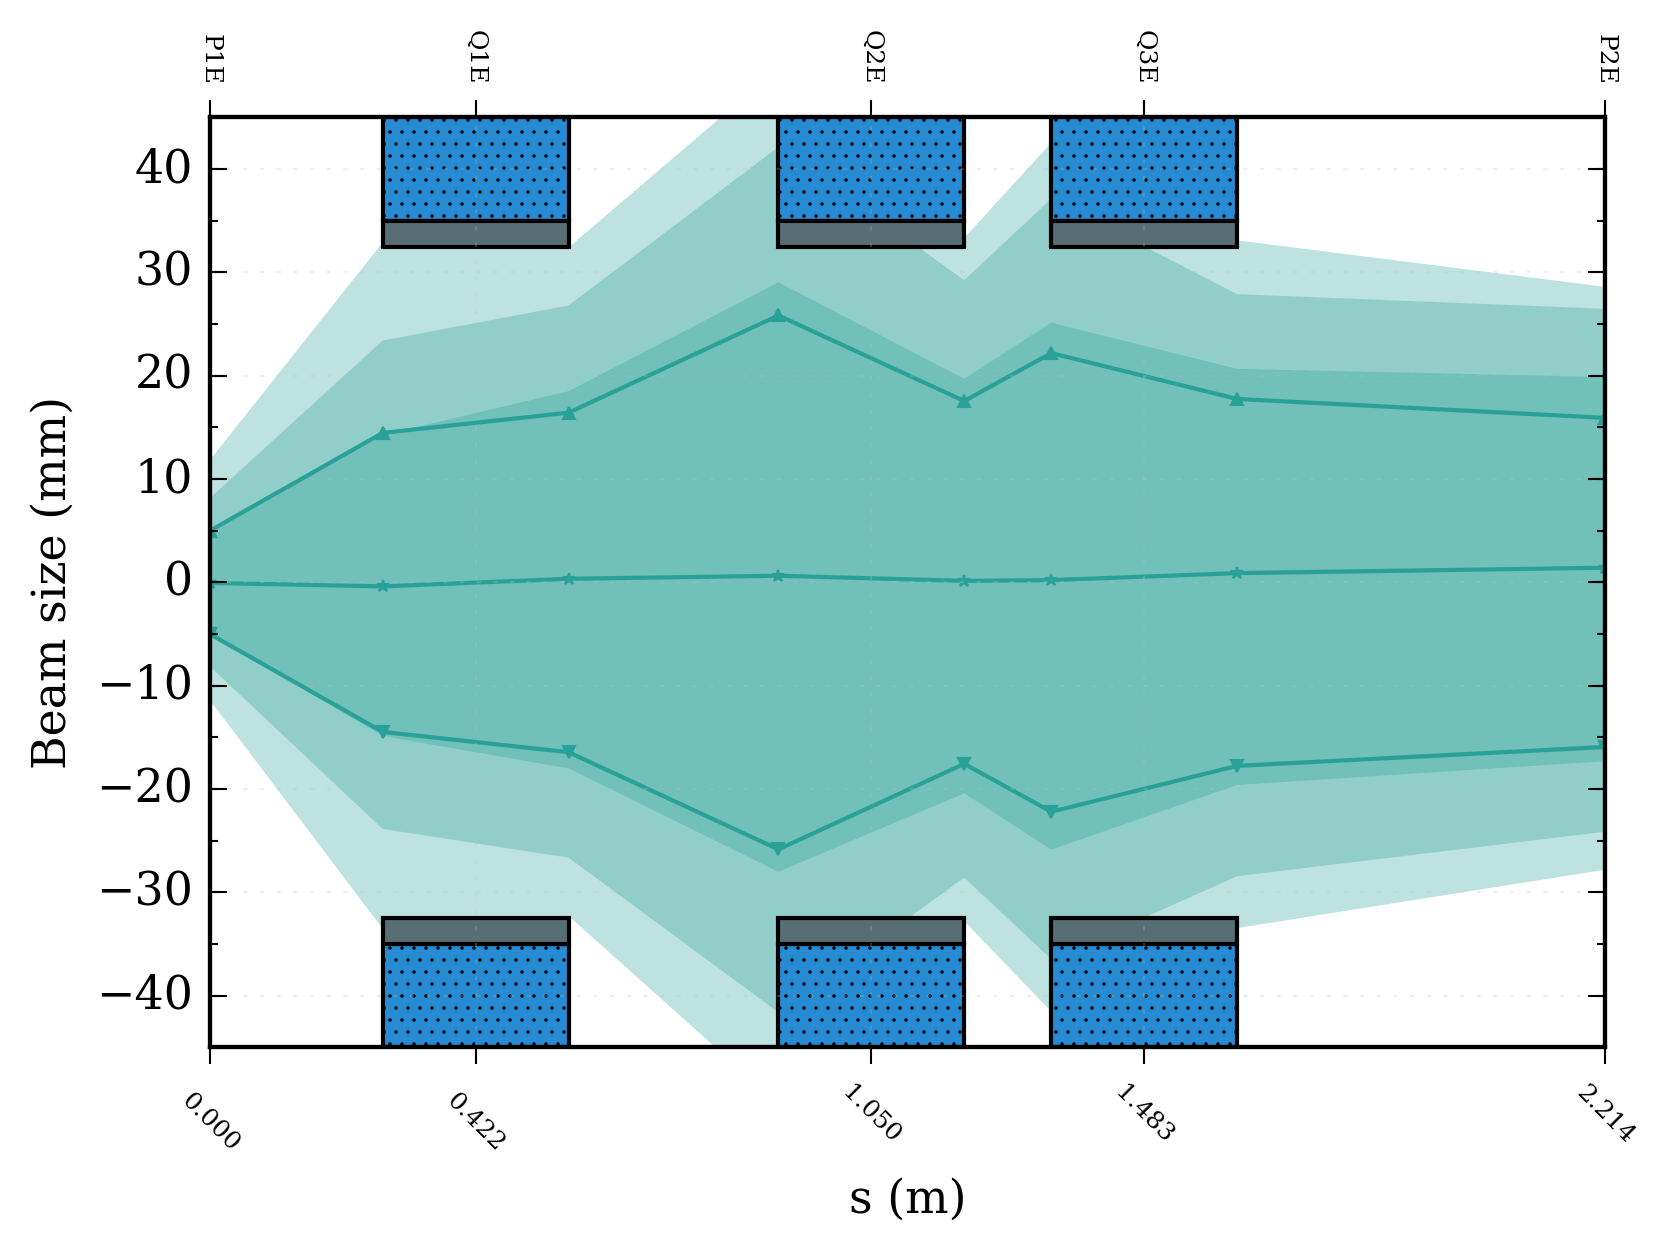

In [295]:
from georges.plotting import *
with plt.style.context('word'):
    fig = plt.figure(1)

    ax1 = fig.add_subplot(111)
    prepare(ax1, bl)
    aperture(ax1, bl)
    #twiss(ax1, bl_twiss, context)
    tracking(ax1, bl_track, context, plane='X')

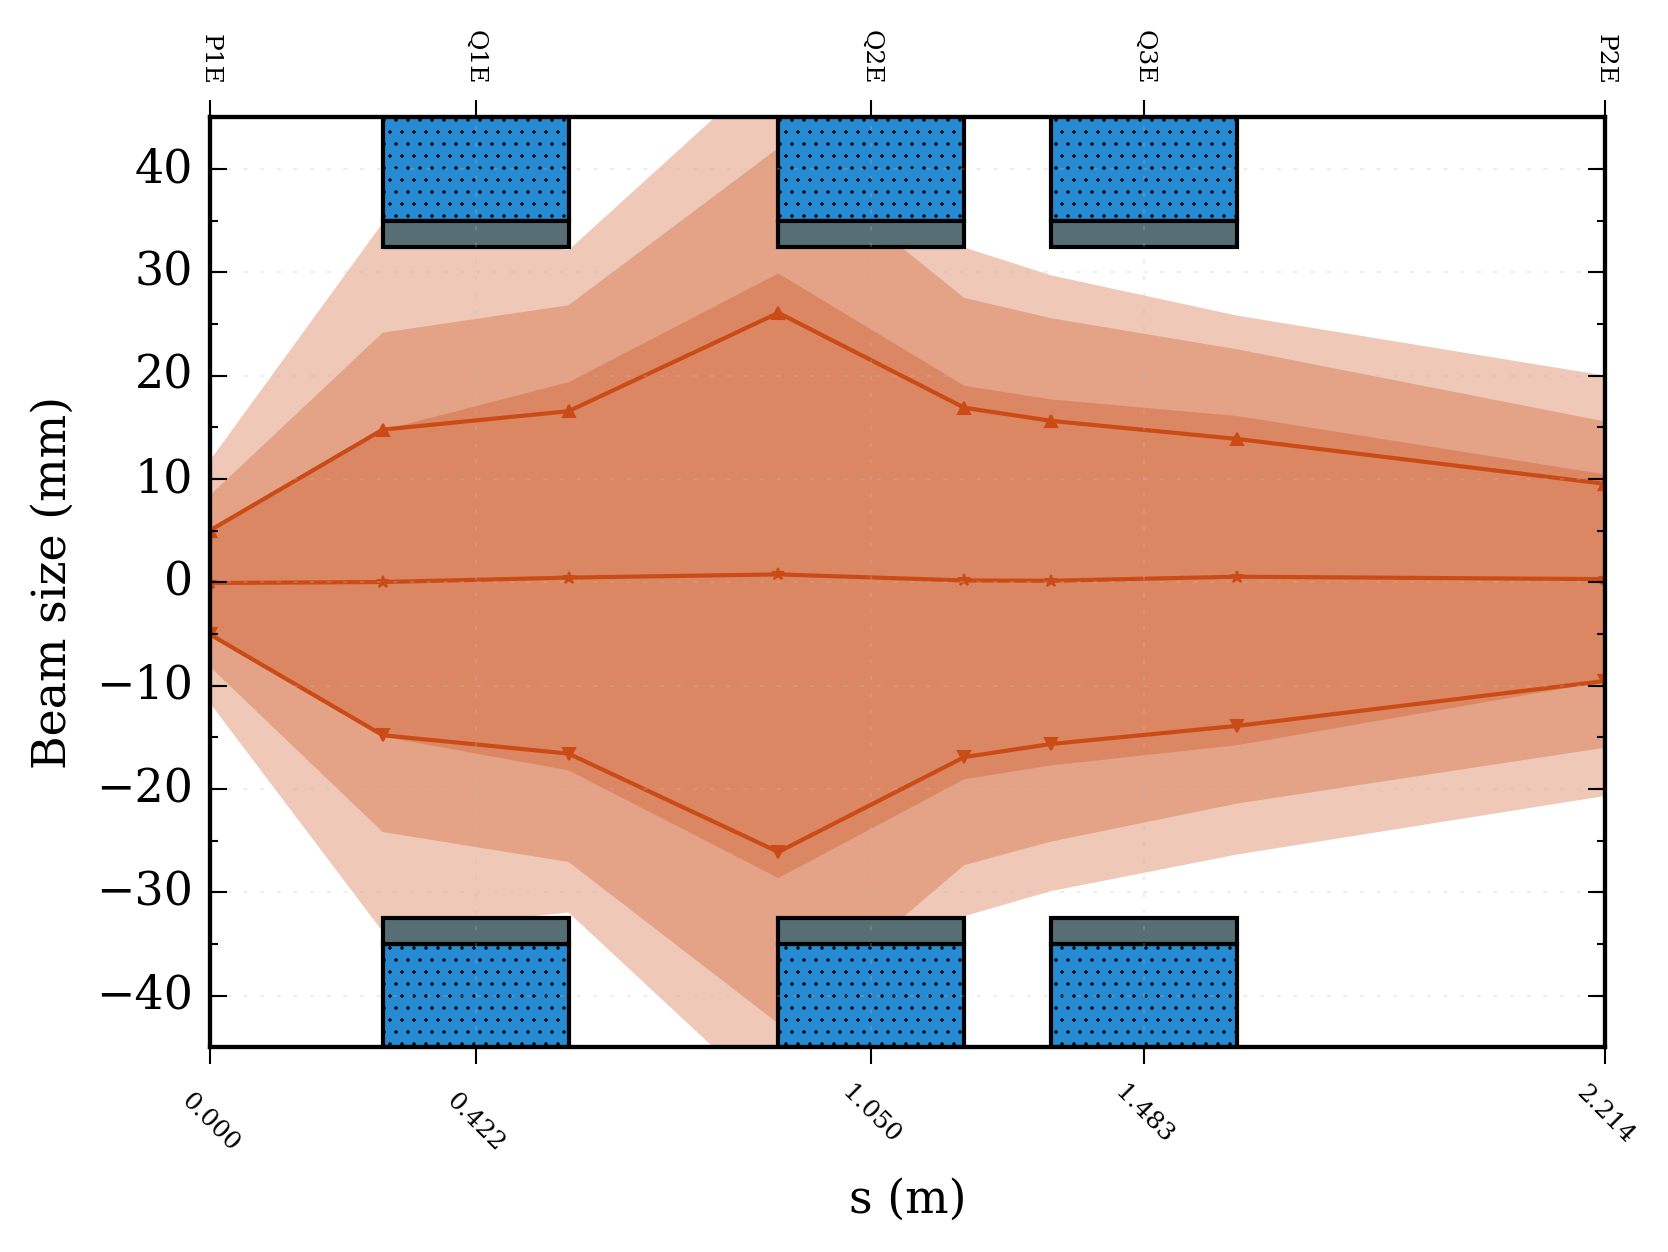

In [296]:
from georges.plotting import *
with plt.style.context('word'):
    fig = plt.figure(1)

    ax1 = fig.add_subplot(111)
    prepare(ax1, bl)
    aperture(ax1, bl)
    #twiss(ax1, bl_twiss, context)
    tracking(ax1, bl_track, context, plane='Y')